<h1>Activity 2: UK ROAD ACCIDENTS</h1>
<hr>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
uk = pd.read_csv('datasets//uk_road_accident.csv')
uk

,Index,Accident_Severity,Accident Date,Latitude,Light_Conditions,District Area,Longitude,Number_of_Casualties,Number_of_Vehicles,Road_Surface_Conditions,Road_Type,Urban_or_Rural_Area,Weather_Conditions,Vehicle_Type
0,200701BS64157,Serious,5/6/2019,51.506187,Darkness - lights lit,Kensington and Chelsea,-0.209082,1,2,Dry,Single carriageway,Urban,Fine no high winds,Car
1,200701BS65737,Serious,2/7/2019,51.495029,Daylight,Kensington and Chelsea,-0.173647,1,2,Wet or damp,Single carriageway,Urban,Raining no high winds,Car
2,200701BS66127,Serious,26-08-2019,51.517715,Darkness - lighting unknown,Kensington and Chelsea,-0.210215,1,3,Dry,NaN,Urban,NaN,Taxi/Private hire car
3,200701BS66128,Serious,16-08-2019,51.495478,Daylight,Kensington and Chelsea,-0.202731,1,4,Dry,Single carriageway,Urban,Fine no high winds,Bus or coach (17 or more pass seats)
4,200701BS66837,Slight,3/9/2019,51.488576,Darkness - lights lit,Kensington and Chelsea,-0.192487,1,2,Dry,NaN,Urban,NaN,Other vehicle
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
660674,201091NM01760,Slight,18-02-2022,57.374005,Daylight,Highland,-3.467828,2,1,Dry,Single carriageway,Rural,Fine no high winds,Car
660675,201091NM01881,Slight,21-02-2022,57.232273,Darkness - no lighting,Highland,-3.809281,1,1,Frost or ice,Single carriageway,Rural,Fine no high winds,Car
660676,201091NM01935,Slight,23-02-2022,57.585044,Daylight,Highland,-3.862727,1,3,Frost or ice,Single carriageway,Rural,Fine no high winds,Car
660677,201091NM01964,Serious,23-02-2022,57.214898,Darkness - no lighting,Highland,-3.823997,1,2,Wet or damp,Single carriageway,Rural,Fine no high winds,Motorcycle over 500cc


In [3]:
uk["Accident Date"] = pd.to_datetime(uk["Accident Date"], errors="coerce", dayfirst=True)

<h1>Filling Null Values</h1>

In [4]:
uk.isnull().sum()

Index                           0
Accident_Severity               0
Accident Date              395672
Latitude                       25
Light_Conditions                0
District Area                   0
Longitude                      26
Number_of_Casualties            0
Number_of_Vehicles              0
Road_Surface_Conditions       726
Road_Type                    4520
Urban_or_Rural_Area            15
Weather_Conditions          14128
Vehicle_Type                    0
dtype: int64

In [5]:
uk['Latitude'] = uk['Latitude'].fillna(uk['Latitude'].mean())
uk['Longitude'] = uk['Longitude'].fillna(uk['Longitude'].mean())
uk['Road_Surface_Conditions'] = uk['Road_Surface_Conditions'].fillna(uk['Road_Surface_Conditions'].mode()[0])
uk['Road_Type'] = uk['Road_Type'].fillna(uk['Road_Type'].mode()[0])
uk['Urban_or_Rural_Area'] = uk['Urban_or_Rural_Area'].fillna(uk['Urban_or_Rural_Area'].mode()[0])
uk['Weather_Conditions'] = uk['Weather_Conditions'].fillna(uk['Weather_Conditions'].mode()[0])
uk.isnull().sum()

Index                           0
Accident_Severity               0
Accident Date              395672
Latitude                        0
Light_Conditions                0
District Area                   0
Longitude                       0
Number_of_Casualties            0
Number_of_Vehicles              0
Road_Surface_Conditions         0
Road_Type                       0
Urban_or_Rural_Area             0
Weather_Conditions              0
Vehicle_Type                    0
dtype: int64

<h1>Questions:</h1>
<hr>

<h2>1. How many accidents occurred by severity?</h2>

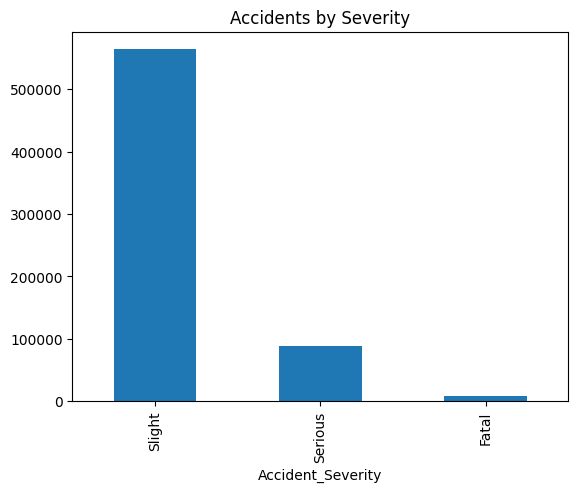

In [6]:
uk["Accident_Severity"].value_counts().plot(kind="bar", title="Accidents by Severity")
plt.show()

<h2>Insights:</h2>
<h3>Most accidents are classified as Slight, while Serious accidents are fewer and Fatal accidents are the least. This suggests that while accidents are frequent, most are not life-threatening. Still, the number of serious and fatal accidents highlights the importance of safety measures.</h3>
<hr>

<h2>2. Are accidents more common in urban or rural areas?</h2>

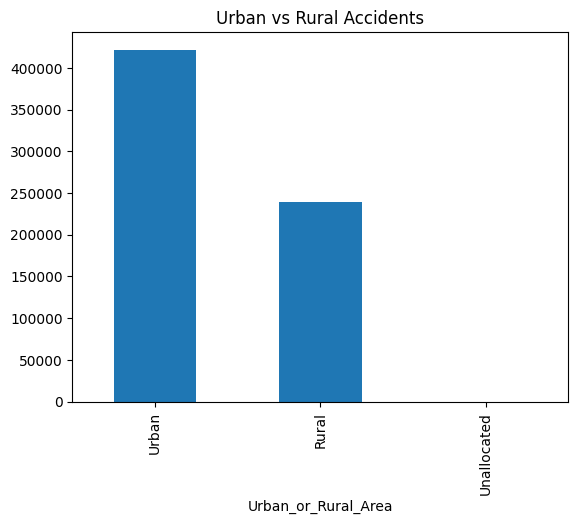

In [7]:
uk["Urban_or_Rural_Area"].value_counts().plot(kind="bar", title="Urban vs Rural Accidents")
plt.show()

<h2>Insights:</h2>
<h3>Urban areas show a much higher number of accidents compared to rural areas. This is expected, as urban regions have denser traffic and more vehicles on the road. Rural accidents, though fewer, can sometimes be more severe due to higher driving speeds.</h3>
<hr>

<h2>3. What is the average number of casualties in Highland district</h2>

In [8]:
high = uk[uk['District Area'] == 'Highland']['Number_of_Casualties'].mean()
print(high)

1.4750123701138051


<h2>Insight:</h2>
<h3>The average number of casualties per accident in the Highland district is approximately 1.48. This means that, on average, each reported accident in Highland involves between one and two casualties. While the value is relatively low, it still indicates that multiple people are sometimes affected in a single incident, making casualty prevention efforts important in this district.</h3>
<hr>

<h2>4. What weather conditions are linked to most accidents?</h2>

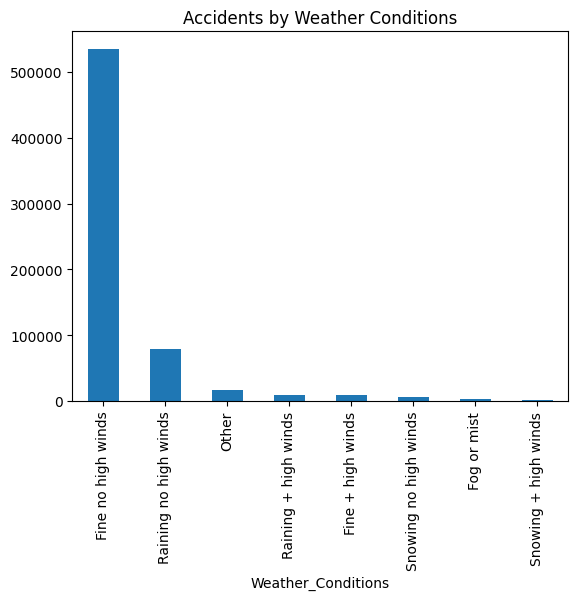

In [9]:
uk["Weather_Conditions"].value_counts().head(10).plot(kind="bar", title="Accidents by Weather Conditions")
plt.show()

<h2>Insights:</h2>
<h3>Most accidents occur in fine weather with no high winds. This indicates that weather is not the only factor—driver behavior and road conditions also matter. Still, wet and windy weather also contributes to a significant share of accidents.</h3>
<hr>

<h2>5. What is the average vehicles involved per road type</h2>

In [10]:
vehicles = uk.groupby(['Vehicle_Type', 'Road_Type']).size().reset_index(name='count')
print(vehicles)

                           Vehicle_Type           Road_Type  count
0                  Agricultural vehicle    Dual carriageway    293
1                  Agricultural vehicle      One way street     49
2                  Agricultural vehicle          Roundabout    129
3                  Agricultural vehicle  Single carriageway   1449
4                  Agricultural vehicle           Slip road     27
..                                  ...                 ...    ...
68  Van / Goods 3.5 tonnes mgw or under    Dual carriageway   5107
69  Van / Goods 3.5 tonnes mgw or under      One way street    723
70  Van / Goods 3.5 tonnes mgw or under          Roundabout   2294
71  Van / Goods 3.5 tonnes mgw or under  Single carriageway  25675
72  Van / Goods 3.5 tonnes mgw or under           Slip road    361

[73 rows x 3 columns]


<h2>Insight:</h2>
<h3>The results show that different vehicle types are involved in varying numbers of accidents depending on the road type. For example, vans and cars appear most frequently on single carriageways and dual carriageways, reflecting their high presence in everyday traffic. Agricultural vehicles and other specialized vehicles occur far less often, suggesting that their risk is lower simply because they are less common on the roads.</h3>
<hr>

<h2>6. Do accidents occur more in daylight or darkness?</h2>

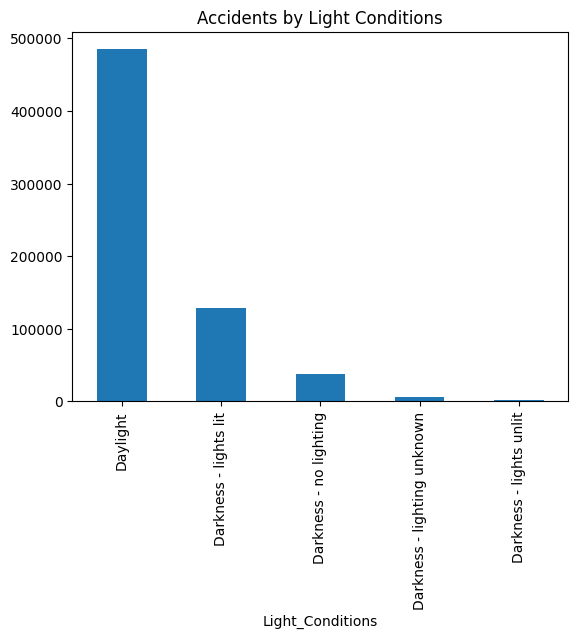

In [11]:
uk["Light_Conditions"].value_counts().plot(kind="bar", title="Accidents by Light Conditions")
plt.show()

<h2>Insights:</h2>
<h3>Accidents happen more frequently during daylight. This is likely because traffic volume is higher in the day. However, nighttime accidents, though fewer, may be more dangerous due to reduced visibility.</h3>
<hr>

<h2>7. Show datas about serious accidents containing two casualties with two vehicles¶</h2>

In [12]:
casual_vehi = uk[(uk['Accident_Severity'] == 'Serious') & (uk['Number_of_Casualties'] > 2) & (uk['Number_of_Vehicles'] > 2)]
print(casual_vehi)

                Index Accident_Severity Accident Date   Latitude  \
511     200701BS70539           Serious           NaT  51.491861   
3335    200701EO40752           Serious           NaT  51.529367   
4525    200701GD63185           Serious    2019-06-02  51.535459   
4747    200701GD66678           Serious    2019-08-05  51.570592   
4837    200701GD67253           Serious           NaT  51.574618   
...               ...               ...           ...        ...   
660263  201063DP30510           Serious           NaT  51.867575   
660310  201063DP35310           Serious           NaT  52.686302   
660375  201063DP42110           Serious           NaT  51.953352   
660394  201091NE00922           Serious           NaT  57.597286   
660550  201091NJ08521           Serious           NaT  58.307893   

              Light_Conditions           District Area  Longitude  \
511      Darkness - lights lit  Kensington and Chelsea  -0.201432   
3335     Darkness - lights lit               

<h2>Insight:</h2>
<h3>The filtered data highlights cases of serious accidents that involve multiple casualties and vehicles, making them particularly severe events. Many of these accidents occurred in urban districts such as Kensington, Islington, and Hackney, where traffic is dense. The presence of both multiple vehicles and casualties suggests that these incidents are likely large collisions, which require strong safety measures and emergency response.</h3>
<hr>

<h2>8. Do accidents happen more on dry or wet road surfaces?</h2>

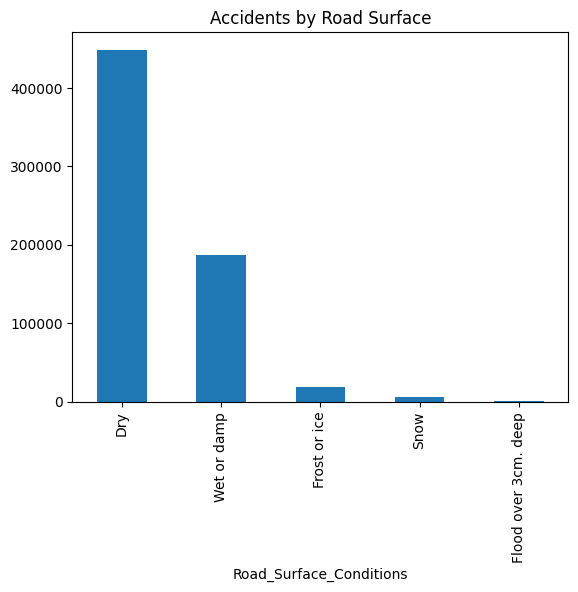

In [13]:
uk["Road_Surface_Conditions"].value_counts().plot(kind="bar", title="Accidents by Road Surface")
plt.show()

<h2>Insights:</h2>
<h3>The majority of accidents occur on dry roads. This may seem surprising, but it reflects that drivers take more risks in safe-looking conditions. Wet and icy roads cause fewer accidents overall but are riskier when they do.</h3>
<hr>

<h2>9. Show the accidents in daylight in Kensington and Chelsea with dry road¶</h2>

In [14]:
weather = uk[(uk['Light_Conditions'] == 'Daylight') & (uk['District Area'] == 'Kensington and Chelsea') & (uk['Road_Surface_Conditions'] == 'Dry')][['Light_Conditions', 'District Area', 'Road_Surface_Conditions']]
print(weather)

       Light_Conditions           District Area Road_Surface_Conditions
3              Daylight  Kensington and Chelsea                     Dry
5              Daylight  Kensington and Chelsea                     Dry
6              Daylight  Kensington and Chelsea                     Dry
9              Daylight  Kensington and Chelsea                     Dry
11             Daylight  Kensington and Chelsea                     Dry
...                 ...                     ...                     ...
532789         Daylight  Kensington and Chelsea                     Dry
532823         Daylight  Kensington and Chelsea                     Dry
532829         Daylight  Kensington and Chelsea                     Dry
533039         Daylight  Kensington and Chelsea                     Dry
533316         Daylight  Kensington and Chelsea                     Dry

[1679 rows x 3 columns]


<h2>Insight:</h2>
<h3>In Kensington and Chelsea, a total of 1,679 accidents occurred during daylight hours on dry road surfaces. This shows that most accidents happen in seemingly safe conditions, not just in adverse weather. It highlights how driver behavior and traffic congestion play a larger role in accidents than weather or road surface quality in this district.</h3>
<hr>

<h2>10. What is the average number of casualties per accident?</h2>

In [15]:
print("Avg casualties per accident:", uk["Number_of_Casualties"].mean())

Avg casualties per accident: 1.357040257068864


<h2>Insights:</h2>
<h3>On average, each accident involves about one casualty. This shows that most incidents affect only one individual. Multiple-casualty accidents are less common but tend to be more severe.</h3>
<hr>

<h2>11. What is the average number of vehicles involved in accidents?</h2>

In [16]:
print("Avg vehicles per accident:", uk["Number_of_Vehicles"].mean())

Avg vehicles per accident: 1.8312554205597575


<h2>Insights:</h2>
<h3>On average, about two vehicles are involved in each accident. This suggests that many accidents are collisions between two vehicles. Multi-vehicle crashes do occur but are relatively less common.</h3>
<hr>

<h2>12. Which road types record the most accidents?</h2>

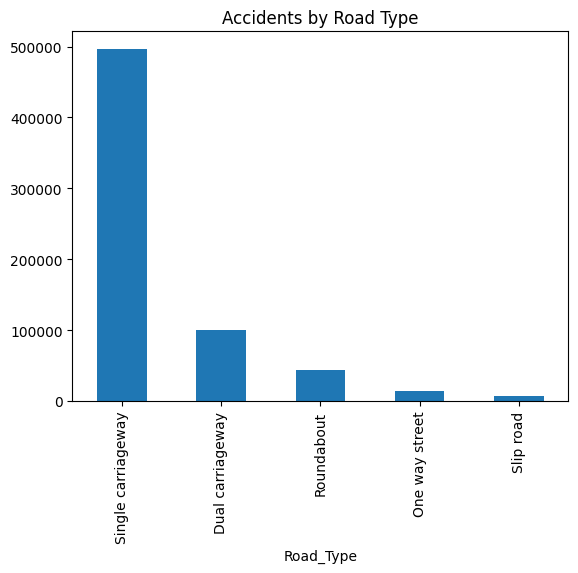

In [17]:
uk["Road_Type"].value_counts().plot(kind="bar", title="Accidents by Road Type")
plt.show()

<h2>Insights:</h2>
<h3>Single carriageways show the highest accident count compared to dual carriageways and roundabouts. This is because single carriageways are the most common road type in the UK. Their high traffic makes them a hotspot for collisions.</h3>
<hr>

<h2>13. Show the accidents happended in Urban area with between three to four number of vehicles only¶</h2>

In [18]:
urban = uk[(uk['Urban_or_Rural_Area'] == 'Urban') & (uk['Number_of_Vehicles'] >= 3) & (uk['Number_of_Vehicles'] <= 4)][['Urban_or_Rural_Area', 'Number_of_Vehicles']]
print(urban)

       Urban_or_Rural_Area  Number_of_Vehicles
2                    Urban                   3
3                    Urban                   4
5                    Urban                   3
19                   Urban                   4
37                   Urban                   3
...                    ...                 ...
660080               Urban                   3
660104               Urban                   3
660189               Urban                   4
660258               Urban                   3
660264               Urban                   3

[34776 rows x 2 columns]


<h2>Insight:</h2>
<h3>The filtered results show that 34,776 urban accidents involved between three and four vehicles. This indicates that multi-vehicle collisions are relatively common in busy city areas where traffic density is high. Such accidents often cause greater disruption and risk compared to two-vehicle incidents, highlighting the importance of traffic flow management in urban environments.</h3>
<hr>

<h2>14. Which districts have the highest number of accidents?</h2>

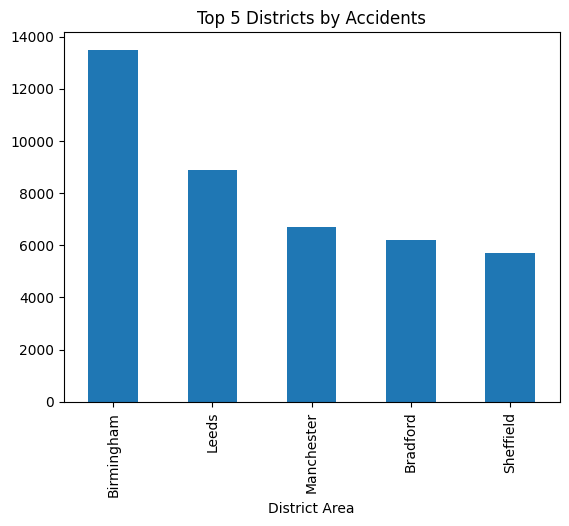

In [19]:
uk["District Area"].value_counts().head(5).plot(kind="bar", title="Top 5 Districts by Accidents")
plt.show()

<h2>Insights:</h2>
<h3>Districts in busy urban regions, such as central London boroughs, report the most accidents. Higher population density and more vehicles explain this trend. Rural districts, by contrast, report far fewer accidents.</h3>
<hr>

<h2>15. How do accidents vary across months?</h2>

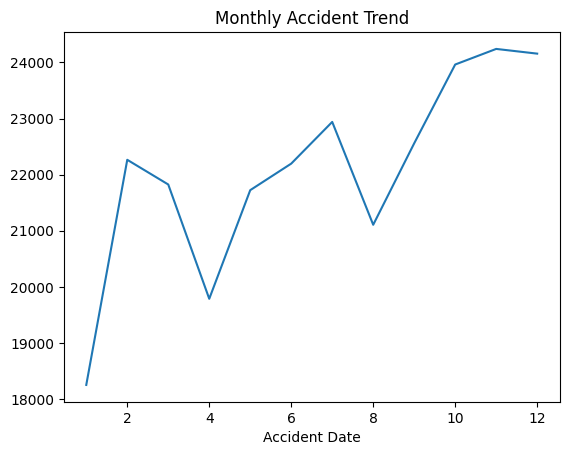

In [20]:
uk.groupby(uk["Accident Date"].dt.month).size().plot(kind="line", title="Monthly Accident Trend")
plt.show()

<h2>Insights:</h2>
<h3>Accidents show a fluctuating trend across months, with some peaks in late summer and autumn. This may be related to increased travel during holidays and changing weather. Winter months may also show spikes due to slippery roads.</h3>
<hr>

<h2>16. Which vehicle types are most involved in accidents?</h2>

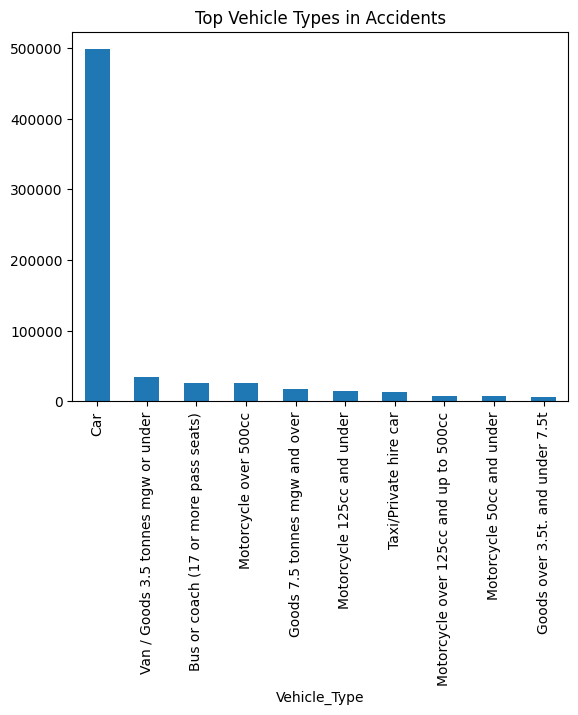

In [21]:
uk["Vehicle_Type"].value_counts().head(10).plot(kind="bar", title="Top Vehicle Types in Accidents")
plt.show()

<h2>Insights:</h2>
<h3>Cars are the most frequently involved vehicle type in accidents, by a wide margin. This is expected since cars dominate UK traffic. Other vehicles like taxis, buses, and bicycles also appear significantly but far less than cars.</h3>
<hr>

<h2>17. How many accidents are fatal compared to non-fatal?</h2>

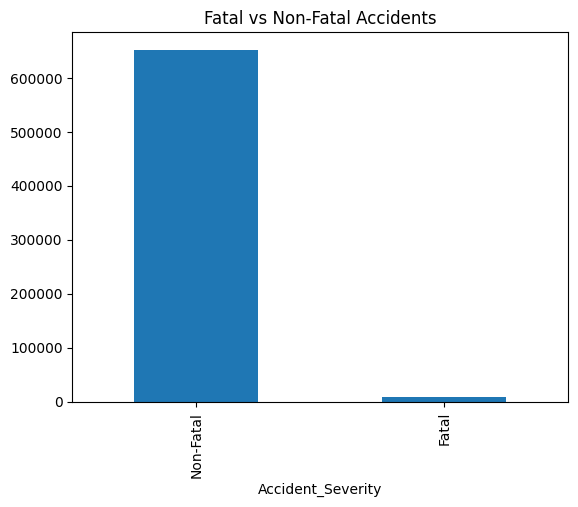

In [22]:
fatal_nonfatal = uk["Accident_Severity"].apply(lambda x: "Fatal" if x=="Fatal" else "Non-Fatal")
fatal_nonfatal.value_counts().plot(kind="bar", title="Fatal vs Non-Fatal Accidents")
plt.show()

<h2>Insights:</h2>
<h3>Non-fatal accidents (serious and slight combined) are much more common than fatal accidents. This shows that while fatalities are rare, they still represent a critical safety concern. Road safety campaigns aim to further reduce the fatal share.</h3>
<hr>

<h2>18. Are accidents more frequent during the day or at night?</h2>

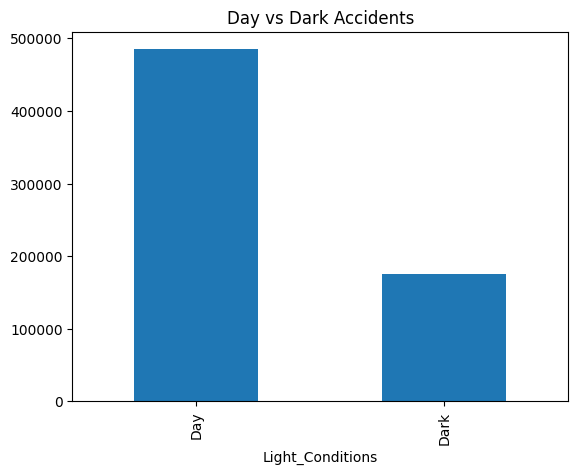

In [23]:
day_dark = uk["Light_Conditions"].apply(lambda x: "Day" if "Daylight" in str(x) else "Dark")
day_dark.value_counts().plot(kind="bar", title="Day vs Dark Accidents")
plt.show()

<h2>Insights:</h2>
<h3>Daytime accidents dominate over nighttime accidents. The higher number of vehicles on the road during the day explains this. Nighttime accidents are less frequent but can often be more severe..</h3>
<hr>

<h2>19. How does accident severity vary with road type?</h2>

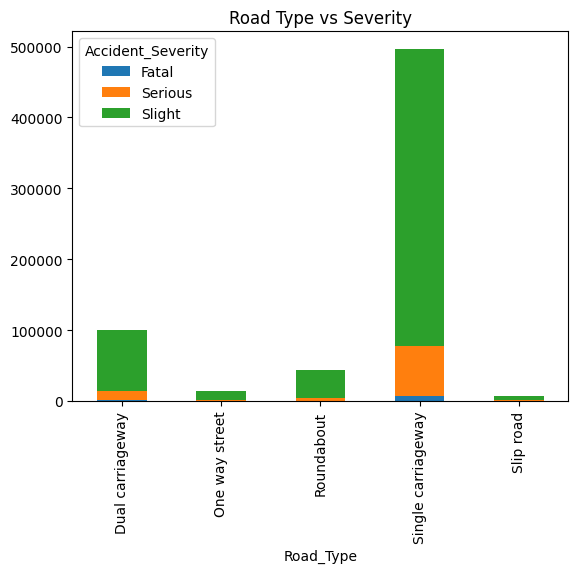

In [24]:
pd.crosstab(uk["Road_Type"], uk["Accident_Severity"]).plot(kind="bar", stacked=True, title="Road Type vs Severity")
plt.show()

<h2>Insights:</h2>
<h3>Single carriageways dominate in slight and serious accidents, while dual carriageways and roundabouts contribute less. The severity of accidents can also differ depending on the speed and traffic density of the road type. This shows that road design plays a role in accident outcomes.</h3>
<hr>

<h2>20. Are accidents more common on weekdays or weekends?</h2>

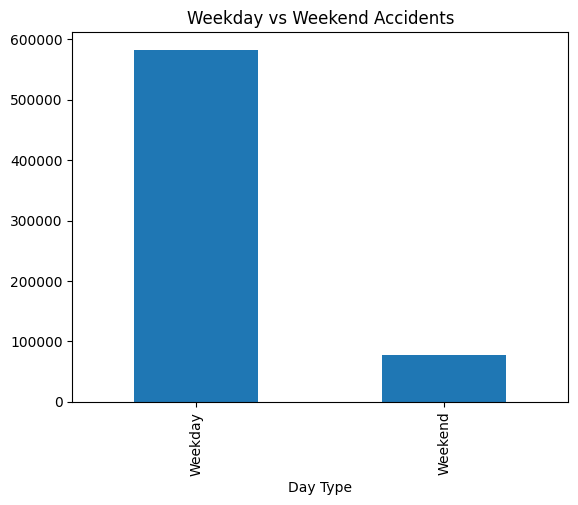

In [25]:
uk["Weekday"] = uk["Accident Date"].dt.dayofweek
uk["Day Type"] = uk["Weekday"].apply(lambda x: "Weekend" if x>=5 else "Weekday")
uk["Day Type"].value_counts().plot(kind="bar", title="Weekday vs Weekend Accidents")
plt.show()

<h2>Insights:</h2>
<h3>Weekday accidents are more frequent than weekend ones. This trend reflects higher commuting and work-related traffic during the week. Weekends, though calmer, still report significant accidents, especially linked to leisure travel.</h3>
<hr>